# Pandas data manipulation and transformation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
imdb_movies = pd.read_csv("../datasets/imdb-movies.csv")
imdb_movies.set_index('Rank', inplace=True)
imdb_movies.shape

(1000, 10)

In [6]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   Runtime (Minutes)   1000 non-null   int64  
 5   Rating              1000 non-null   float64
 6   Votes               1000 non-null   int64  
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           936 non-null    float64
 9   Actors              1000 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [7]:
imdb_movies.sample(5)

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
Rank,,,,,,,,,,
416,Tusk,"Comedy,Drama,Horror",Kevin Smith,2014,102,5.4,34546,1.82,55.0,"Justin Long, Michael Parks, Haley Joel Osment,..."
118,Dangal,"Action,Biography,Drama",Nitesh Tiwari,2016,161,8.8,48969,11.15,NaN,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,..."
529,Godzilla,"Action,Adventure,Sci-Fi",Gareth Edwards,2014,123,6.4,318058,200.66,62.0,"Aaron Taylor-Johnson, Elizabeth Olsen, Bryan C..."
515,Magic Mike XXL,"Comedy,Drama,Music",Gregory Jacobs,2015,115,5.7,42506,NaN,60.0,"Channing Tatum, Joe Manganiello, Matt Bomer,Ad..."
442,Brooklyn,"Drama,Romance",John Crowley,2015,117,7.5,94977,38.32,87.0,"Saoirse Ronan, Emory Cohen, Domhnall Gleeson,J..."


### Question 1A: Do movies longer than 2h45 (165mins) get better scores than movies shorter than 100 mins?

In [8]:
# 2 hrs 45 = 165 mins

# average of scores > 165 mins
# average of scores < 100 mins

long_movies  = sum(  (imdb_movies.loc[:,'Runtime (Minutes)'] > 165) & (imdb_movies['Metascore'] > 0 ) )
short_movies = sum(  (imdb_movies.loc[:,'Runtime (Minutes)'] < 100) & (imdb_movies['Metascore'] > 0 ) )

print("number of movies > 2hrs 45 = ",long_movies)
print("number of movies < 100 mins = ",short_movies)


#imdb_movies.groupby(['Runtime (Minutes)', 'Metascore']).mean()

imdb_movies.loc[imdb_movies['Runtime (Minutes)']<100,'Score vs length'] = 'Less than 100 mins'     #short
imdb_movies.loc[imdb_movies['Runtime (Minutes)']>165,'Score vs length'] = 'Over 2hrs 45 mins'     #long

imdb_movies.groupby(['Score vs length']).mean()['Metascore']


number of movies > 2hrs 45 =  9
number of movies < 100 mins =  227


/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_16739/55455135.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  imdb_movies.groupby(['Score vs length']).mean()['Metascore']


Score vs length
Less than 100 mins    55.867841
Over 2hrs 45 mins     67.222222
Name: Metascore, dtype: float64

In [9]:
short = imdb_movies["Runtime (Minutes)"] < 100
long = imdb_movies["Runtime (Minutes)"] > 165
print(imdb_movies[short]["Metascore"].mean())
print(imdb_movies[long]["Metascore"].mean())

55.86784140969163
67.22222222222223


In [10]:
movies_longer = imdb_movies[imdb_movies['Runtime (Minutes)'] >= 165].sort_values(by="Rating",ascending=False)
movies_shorter = imdb_movies[imdb_movies['Runtime (Minutes)'] <= 100].sort_values(by="Rating",ascending=False)

print(f" Mean rating of movies shorter 1h40 : {movies_shorter['Rating'].mean()}")
print(f" Mean rating of movies longer 2h45 : {movies_longer['Rating'].mean()}")

 Mean rating of movies shorter 1h40 : 6.316304347826088
 Mean rating of movies longer 2h45 : 7.675


### Question 1B. Visualise the response to 1A with an appropriate plot (matplotlib)

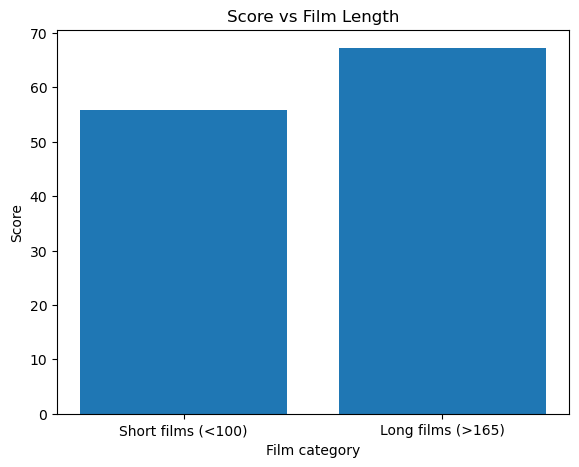

In [25]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])    

labels = ['Short films (<100)', 'Long films (>165)']
scores = [imdb_movies[short]["Metascore"].mean(), imdb_movies[long]["Metascore"].mean()]

ax.set_xlabel('Film category')
ax.set_ylabel('Score')
ax.set_title('Score vs Film Length')

ax.bar(labels,scores)

plt.show()
#plt.savefig('bar1.png', dpi=200)

<Axes: xlabel='Runtime (Minutes)', ylabel='Rating'>

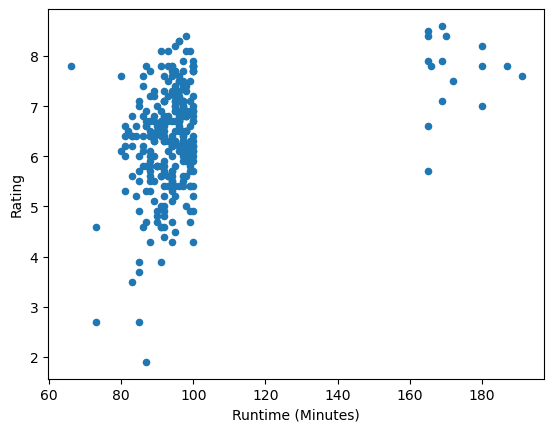

In [19]:
movies_between = imdb_movies[(imdb_movies['Runtime (Minutes)'] >= 165) | (imdb_movies['Runtime (Minutes)'] <= 100)]
movies_between.plot.scatter(x='Runtime (Minutes)', y='Rating')

### Question 2: Which is the director with highest revenue per minute of runtime?

In [24]:
# Divide revenue by runtime (unfiltered/not cleaned) 

#imdb_movies.groupby(['Director', 'Runtime (Minutes)' ]).sum()['Revenue (Millions)']

imdb_movies.loc[imdb_movies['Runtime (Minutes)'] > 0,'Revenue by minute'] = imdb_movies['Revenue (Millions)'] / imdb_movies['Runtime (Minutes)']

#imdb_movies.groupby(['Director']).sum()['Revenue by minute'].max()
                                                                        #row   #descending order
imdb_movies.groupby(['Director']).sum()['Revenue by minute'].sort_values(0, 0, False)


/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_16739/3294392306.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  imdb_movies.groupby(['Director']).sum()['Revenue by minute'].sort_values(0, 0, False)
/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_16739/3294392306.py:9: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  imdb_movies.groupby(['Director']).sum()['Revenue by minute'].sort_values(0, 0, False)


Director
J.J. Abrams          12.841471
David Yates          11.950776
Francis Lawrence     10.243712
Christopher Nolan     9.738683
Michael Bay           9.423046
                       ...    
James Franco          0.000000
James Lapine          0.000000
Jeff Grace            0.000000
Jeffrey G. Hunt       0.000000
Gillies MacKinnon     0.000000
Name: Revenue by minute, Length: 644, dtype: float64

In [20]:
imdb_movies_clean_revenue = imdb_movies[imdb_movies['Revenue (Millions)'].notna()]
imdb_movies_clean_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               872 non-null    object 
 1   Genre               872 non-null    object 
 2   Director            872 non-null    object 
 3   Year                872 non-null    int64  
 4   Runtime (Minutes)   872 non-null    int64  
 5   Rating              872 non-null    float64
 6   Votes               872 non-null    int64  
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           838 non-null    float64
 9   Actors              872 non-null    object 
 10  Score vs length     196 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 81.8+ KB


In [21]:
imdb_movies_clean_revenue['revenue_per_min'] = imdb_movies_clean_revenue['Revenue (Millions)'] / imdb_movies_clean_revenue['Runtime (Minutes)']

/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_16739/3093295231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_movies_clean_revenue['revenue_per_min'] = imdb_movies_clean_revenue['Revenue (Millions)'] / imdb_movies_clean_revenue['Runtime (Minutes)']


In [22]:
imdb_movies_clean_revenue['revenue_per_min']

Rank
1       2.753140
2       1.019839
3       1.180513
4       2.502963
5       2.642439
          ...   
994     0.619897
995     0.621818
997     0.186596
998     0.591939
1000    0.225747
Name: revenue_per_min, Length: 872, dtype: float64

In [23]:
attr =[ "Director", "Rating", "revenue_per_min", 'Runtime (Minutes)', 'Revenue (Millions)']
grouped_by_director = imdb_movies_clean_revenue[attr].groupby('Director')
grouped_by_director.mean().sort_values(by="revenue_per_min", ascending=False)

,Rating,revenue_per_min,Runtime (Minutes),Revenue (Millions)
Director,,,,
Colin Trevorrow,7.0,5.259516,124.0,652.18
James Cameron,7.8,4.694506,162.0,760.51
Chris Renaud,6.6,4.233448,87.0,368.31
Lee Unkrich,8.3,4.028932,103.0,414.98
Chris Buck,7.5,3.928824,102.0,400.74
...,...,...,...,...
So Yong Kim,6.4,0.000119,84.0,0.01
Phillip Guzman,4.7,0.000101,99.0,0.01
Patricia Rozema,5.9,0.000099,101.0,0.01


### Question 3: which is the most common movie genre in our dataset between 2007 and 2014?

In [181]:
# filter by year >= 2007 and year <=2014

YEARS = np.arange(2007, 2015)

print(imdb_movies.groupby(['Year']).max()['Genre'].filter(YEARS))

print()
print("Most common genre between 2007 and 2014 is:", imdb_movies.groupby(['Year']).max()['Genre'].filter(YEARS).max() )


Year
2007                   Thriller
2008            Sci-Fi,Thriller
2009    Horror,Mystery,Thriller
2010           Mystery,Thriller
2011    Romance,Sci-Fi,Thriller
2012             Horror,Mystery
2013           Mystery,Thriller
2014                   Thriller
Name: Genre, dtype: object

Most common genre between 2007 and 2014 is: Thriller


/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_48283/672679285.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  print(imdb_movies.groupby(['Year']).max()['Genre'].filter(YEARS))
/var/folders/ry/3hkntqmd6lx9rvtg9q4zp4vr0000gn/T/ipykernel_48283/672679285.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  print("Most common genre between 2007 and 2014 is:", imdb_movies.groupby(['Year']).max()['Genre'].filter(YEARS).max() )


### Question 4: which is the actor who has appeared in more movies between 2009 and 2015?

In [349]:
# filter by year => 2009 and year <= 2015

#imdb_movies.groupby(['Year']).max()['Actors'].filter(YEARS)

#uniqueActors = set(sorted(imdb_movies['Actors'].unique()))

#imdb_movies.groupby(['Year']).max()['Actors'].filter(YEARS).max()



#split the Actors column into separate columns (one per actor)
actors_df = imdb_movies['Actors'].str.split(",",expand=True,)
#actors_df

#add year column from original df
actors_df['Year']= imdb_movies['Year']

# rename columns for access
actors_df.columns = ['Actor1', 'Actor2', 'Actor3', 'Actor4', 'Year']

#drop rows if year < 2009 or year > 2015
actors_df = actors_df.drop(actors_df[(actors_df['Year'] < 2009) | (actors_df['Year'] > 2015)].index)

#testing
print("Separated actor columns for testing:")
print()
print(actors_df)

print()
print("Max of 1st Actor col:",actors_df['Actor1'].dropna().max())
print("Max of 2nd Actor col:",actors_df['Actor2'].dropna().max())
print("Max of 3rd Actor col:",actors_df['Actor3'].dropna().max())
print("Max of 4th Actor col:",actors_df['Actor4'].dropna().max())


# Merge the four actor columns into a list, then find the most frequent

print()
print("Now merging the four actor columns into one column...")
merged_list = pd.concat( [ actors_df['Actor1'], actors_df['Actor2'], actors_df['Actor3'], actors_df['Actor4']])
print()
print("Length of the merged actor cols: ",len(merged_list))
print("Most popular actor between years 2009-2015 is: ",merged_list.dropna().max())


Separated actor columns for testing:

                   Actor1                 Actor2                  Actor3  \
Rank                                                                       
1             Chris Pratt             Vin Diesel          Bradley Cooper   
2            Noomi Rapace   Logan Marshall-Green      Michael Fassbender   
27                Prabhas         Rana Daggubati          Anushka Shetty   
37    Matthew McConaughey          Anne Hathaway        Jessica Chastain   
46            Johnny Depp          Penélope Cruz             Ian McShane   
...                   ...                    ...                     ...   
993          Topher Grace             Anna Faris              Dan Fogler   
994        Milla Jovovich             Ali Larter        Wentworth Miller   
995           Thomas Mann          Oliver Cooper   Jonathan Daniel Brown   
996      Chiwetel Ejiofor          Nicole Kidman           Julia Roberts   
999            Adam Pally            T.J. Miller  